## Using PandaSQL and sqlite3 with pandas

The objective of this notebook is to make some SQL queries as well as try and identify any useful information out of the 
netflix_title dataset. This dataset is available below:
    
https://www.kaggle.com/shivamb/netflix-shows

In [1]:
import sqlite3
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
data = pd.read_csv("netflix_titles.csv")
print("There are ", len(data), " items in the netflix csv")
data.head()

There are  7787  items in the netflix csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
is_Movie = data['type'] == 'Movie'
df = data[is_Movie]
print("There are ", len(df), " movies in the netflix csv")
df.head()

There are  5377  movies in the netflix csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


Lets use SQL to do the exat same thing as above

In [4]:
query = """
            SELECT count(type), type
            FROM data
            GROUP BY type
        """
print(sqldf(query))

   count(type)     type
0         5377    Movie
1         2410  TV Show


### Lets do some basic queries

* Find all the movies that mention the word 'zombie' in the description

* Now lets find the sum of all the movies & TV-Shows that mention the word 'zombie' in the description

* Who is the most common 'movie' director in netflix_titles.csv

* Find a count of all 'movies' released in the United States per year

1) Find all the movies that mention the word 'zombie' in the description

In [5]:
query = """
            SELECT title
            FROM data
            WHERE type = 'Movie' AND description LIKE '%zombie%'
        """
print(sqldf(query))

                                     title
0   Bill Burr: I'm Sorry You Feel That Way
1               Day of the Dead: Bloodline
2                               Here Alone
3                                 KL Zombi
4                 Little Singham: Mahabali
5                               ParaNorman
6                                 Ravenous
7              Scooby-Doo on Zombie Island
8                            The Evil Dead
9                               The Rezort
10                          Train to Busan
11                              Zombieland


2) Now lets find the sum of all the movies & TV-Shows that mention the word 'zombie' in the description

In [6]:
query = """
            SELECT count(title) as num_zombie_references
            FROM data
            WHERE description LIKE '%zombie%'
        """
print(sqldf(query))

   num_zombie_references
0                     22


3) Who is the most common 'movie' director in netflix_titles.csv

In [7]:
query = """
            SELECT director, count(director) as num 
            FROM data
            WHERE type = 'Movie'
            GROUP BY director
            ORDER BY count(director) DESC
            LIMIT 20
        """
print(sqldf(query))

                  director  num
0   Raúl Campos, Jan Suter   18
1             Marcus Raboy   15
2                Jay Karas   14
3      Cathy Garcia-Molina   13
4              Jay Chapman   12
5          Martin Scorsese   12
6          Youssef Chahine   12
7         Steven Spielberg   10
8             David Dhawan    9
9              Hakan Algül    8
10              Johnnie To    8
11          Kunle Afolayan    8
12             Lance Bangs    8
13        Robert Rodriguez    8
14         Shannon Hartman    8
15        Don Michael Paul    7
16         Fernando Ayllón    7
17          Justin G. Dyck    7
18                     McG    7
19             Omoni Oboli    7


4) Lets find a count of all 'movies' released in the United States per year

In [8]:
query = """
            SELECT count(title), release_year
            FROM data
            WHERE release_year < 2021 AND type = 'Movie' AND country Like '%United States%'
            GROUP BY release_year
        """
print(sqldf(query))

    count(title)  release_year
0              2          1942
1              3          1943
2              3          1944
3              3          1945
4              1          1946
..           ...           ...
60           271          2016
61           351          2017
62           301          2018
63           252          2019
64           180          2020

[65 rows x 2 columns]


What I am going to do below is create a netflix_sql database out of the netflix_titles.csv so that i can perform sql queries
and write the output as a pandas dataframe so that it can be used in matplotlib.

In [9]:
netflix = create_engine('sqlite:///netflix_sql.db')
data.to_sql('data', con = netflix)
conn = sqlite3.connect("netflix_sql.db")

In [10]:
us_counts = pd.read_sql(query,conn)
us_counts.head()

,count(title),release_year
0,2,1942
1,3,1943
2,3,1944
3,3,1945
4,1,1946


Text(0,0.5,'Num of releases')

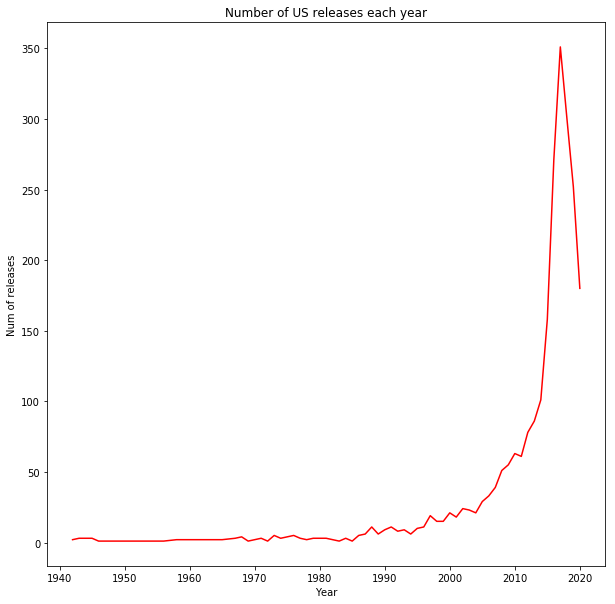

In [11]:
fig = plt.figure(figsize=(10,10))

plt.plot(us_counts['release_year'].values,
         us_counts['count(title)'].values,
         color='red')

plt.title('Number of US releases each year')
plt.xlabel('Year')
plt.ylabel('Num of releases')

### New query

Lets find the top movie producing countries and plot the number of releases per year.  This will not include titles where 
multiple countriues releasing the same title.

In [12]:
query = """
            SELECT count(title) as sum, country
            FROM data
            WHERE type = 'Movie'
            GROUP BY country
            ORDER BY count(title) DESC
            LIMIT 10
        """
print(sqldf(query))

    sum         country
0  1850   United States
1   852           India
2   230            None
3   193  United Kingdom
4   118          Canada
5    89           Egypt
6    89           Spain
7    73          Turkey
8    70     Philippines
9    69          France


In [13]:
query = """
            SELECT count(title) as country_sum, country, release_year
            FROM data
            WHERE release_year < 2021 AND type = 'Movie' AND country LIKE 'United States' OR country LIKE 'India' OR country LIKE 'United Kingdom'
            GROUP BY country, release_year
        """
print(sqldf(query))

     country_sum        country  release_year
0              1          India          1959
1              1          India          1962
2              1          India          1964
3              1          India          1966
4              1          India          1969
..           ...            ...           ...
148          202  United States          2016
149          279  United States          2017
150          238  United States          2018
151          210  United States          2019
152          160  United States          2020

[153 rows x 3 columns]


In [14]:
top3_counts = pd.read_sql(query,conn)
top3_counts.head()

,country_sum,country,release_year
0,1,India,1959
1,1,India,1962
2,1,India,1964
3,1,India,1966
4,1,India,1969


In [15]:
us = top3_counts.loc[top3_counts['country'] == 'United States']
uk = top3_counts.loc[top3_counts['country'] == 'United Kingdom']
In = top3_counts.loc[top3_counts['country'] == 'India']

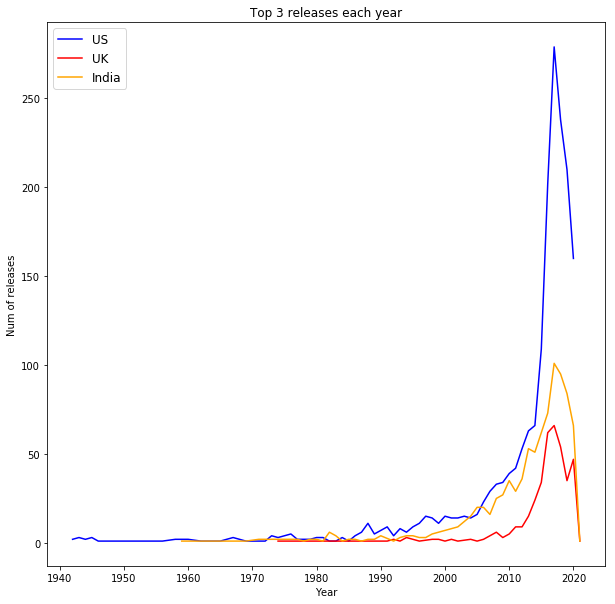

In [16]:
fig = plt.figure(figsize=(10,10))

plt.plot(us['release_year'].values,
         us['country_sum'].values,
         color='blue',
         label = 'US')

plt.plot(uk['release_year'].values,
         uk['country_sum'].values,
         color='red',
         label = 'UK')

plt.plot(In['release_year'].values,
         In['country_sum'].values,
         color='orange',
         label = 'India')



plt.title('Top 3 releases each year')
plt.xlabel('Year')
plt.ylabel('Num of releases')
plt.legend(prop={'size': 12})

Why has there been a drop in movie production? It was growing exponentially for all 3 countries but took a dive towards the end of 2010. 
 
* Could it be related to newer movie titles not being made available on Netflix? 
* Could there be a higher demand for TV Shows or higher demand for movie entertainment for an earlier time?

### New Query
Lets find the top TV-Show producing countries and plot the number of releases per year. This will not include titles where multiple countriues releasing the same title

In [17]:
query = """
            SELECT count(title) as sum, country
            FROM data
            WHERE type = 'TV Show'
            GROUP BY country
            ORDER BY count(title) DESC
            LIMIT 20
        """
print(sqldf(query))

    sum                country
0   705          United States
1   277                   None
2   204         United Kingdom
3   157                  Japan
4   147            South Korea
5    71                  India
6    68                 Taiwan
7    59                 Canada
8    46              Australia
9    46                 France
10   45                  Spain
11   36                  China
12   35                 Mexico
13   27                 Turkey
14   26                 Brazil
15   22               Thailand
16   22  United States, Canada
17   20               Colombia
18   19                Germany
19   17              Singapore


In [18]:
query = """
            SELECT count(title) as country_sum, country, release_year
            FROM data
            WHERE release_year < 2021 AND type = 'TV Show' AND country LIKE 'United States' 
            OR country LIKE 'United Kingdom' 
            OR country LIKE 'Japan'
            OR country LIKE 'South Korea'
            OR country LIKE 'India'
            GROUP BY country, release_year
        """
print(sqldf(query))

     country_sum        country  release_year
0              1          India          1959
1              1          India          1962
2              1          India          1964
3              1          India          1966
4              1          India          1969
..           ...            ...           ...
158           52  United States          2016
159           72  United States          2017
160          110  United States          2018
161          149  United States          2019
162          172  United States          2020

[163 rows x 3 columns]


In [19]:
top_TV_counts = pd.read_sql(query,conn)
top_TV_counts

,country_sum,country,release_year
0,1,India,1959
1,1,India,1962
2,1,India,1964
3,1,India,1966
4,1,India,1969
...,...,...,...
158,52,United States,2016
159,72,United States,2017
160,110,United States,2018
161,149,United States,2019


In [20]:
us = top_TV_counts.loc[top_TV_counts['country'] == 'United States']
uk = top_TV_counts.loc[top_TV_counts['country'] == 'United Kingdom']
In = top_TV_counts.loc[top_TV_counts['country'] == 'India']
jp = top_TV_counts.loc[top_TV_counts['country'] == 'Japan']
sk = top_TV_counts.loc[top_TV_counts['country'] == 'South Korea']

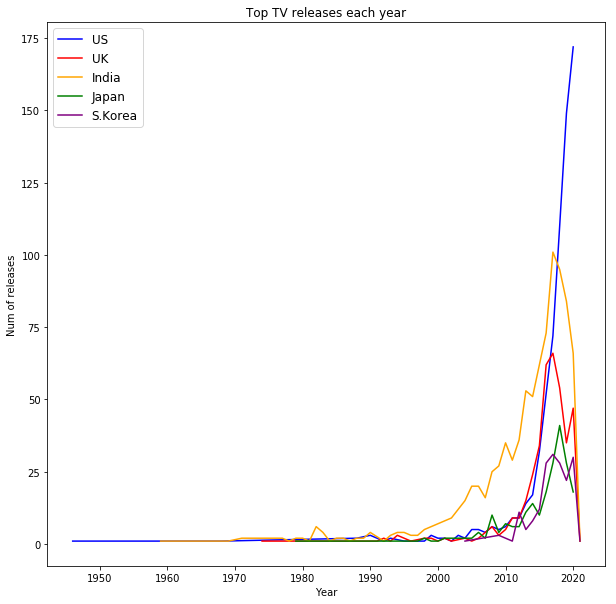

In [21]:
fig = plt.figure(figsize=(10,10))

plt.plot(us['release_year'].values,
         us['country_sum'].values,
         color='blue',
         label = 'US')

plt.plot(uk['release_year'].values,
         uk['country_sum'].values,
         color='red',
         label = 'UK')

plt.plot(In['release_year'].values,
         In['country_sum'].values,
         color='orange',
         label = 'India')

plt.plot(jp['release_year'].values,
         jp['country_sum'].values,
         color='green',
         label = 'Japan')

plt.plot(sk['release_year'].values,
         sk['country_sum'].values,
         color='purple',
         label = 'S.Korea')



plt.title('Top TV releases each year')
plt.xlabel('Year')
plt.ylabel('Num of releases')
plt.legend(prop={'size': 12})

At a quick glance, it would appear that the US has an exponential growth in US-based TV Shows on Netflix. If there was more information in the csv on 'user ratings' and 'Netflix Original TV Shows', I feel that some more useful information could be extract out of these graphs and why some countries show a decline in both new Movies and TV Shows. 